In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "/content/drive/MyDrive/IR-data/email-Eu-core.txt.gz"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv(url, compression='gzip', sep=',', quotechar='"')
data=np.append(data,['0 1'])

In [57]:
dd=[str(d).split() for d in data]
node1=[int(d[0]) for d in dd]
node2=[int(d[1]) for d in dd]
node1.extend(node2)
nodes = list(set(node1))


In [ ]:
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
print(max(nodes))

1004


In [ ]:
print(min(nodes))

0


In [58]:
edges=[]
am=np.zeros((len(nodes),len(nodes)))
for d in dd:
  edges.append((int(d[0]),int(d[1])))
  am[int(d[0])][int(d[1])]+=1


In [59]:
a=list(np.sum(am,axis=0))
b=list(np.sum(am,axis=1))
average_indegree=sum([int(i) for i in a])/len(nodes)
average_outdegree=sum([int(i) for i in b])/len(nodes)
max_indegree,max_in_id=max(a),a.index(int(max(a)))
max_outdegree,max_out_id=max(b),b.index(int(max(b)))
density_of_graph=len(edges)/(1005*1005)

In [60]:
print("Number of nodes: "+str(len(nodes)))
print("Number of edges: "+str(len(edges)))
print("Average in-degree: "+str(average_indegree))                                    
print("Average out-degree: "+str(average_outdegree))
print("Node with max in-degree: "+str(max_in_id))
print("Node with max out-degree: "+str(max_out_id))
print("Network Density: "+str(density_of_graph))

Number of nodes: 1005
Number of edges: 25571
Average in-degree: 25.443781094527363
Average out-degree: 25.443781094527363
Node with max in-degree: 160
Node with max out-degree: 160
Network Density: 0.0253171951189327


In [61]:
lcc={}
for n in nodes:
  neigh_of_n=[]
  for k in nodes:
    if (am[n][k]==1 or am[k][n]==1):
      neigh_of_n.append(k)
  neigh_of_n=list(set(neigh_of_n))
  num_of_neigh=len(neigh_of_n)
  count_link=0
  for i in neigh_of_n:
    for j in neigh_of_n:
      if (j!=i and (am[i][j]==1)):
        count_link+=1
  if num_of_neigh<=1:
    lcc[n]=0
  else:
    lcc[n]=count_link/(num_of_neigh*(num_of_neigh-1))


In [62]:
def freq(l):
  f={}
  for i in l:
    if i not in f:
      f[i]=1
    else:
      f[i]+=1
  return f

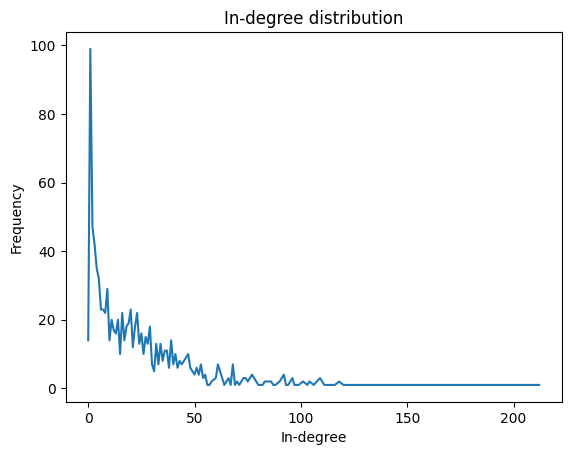

In [63]:
d=freq(a)
d = sorted(d.items(), key= lambda x:x[0])
plt.plot([x[0] for x in d], [x[1] for x in d])
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("In-degree distribution")
plt.show()

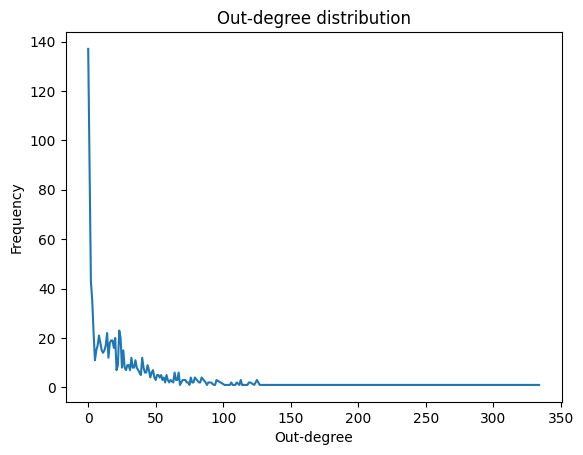

In [64]:
d=freq(b)
d = sorted(d.items(), key= lambda x:x[0])
plt.plot([x[0] for x in d], [x[1] for x in d])
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Out-degree distribution")
plt.show()

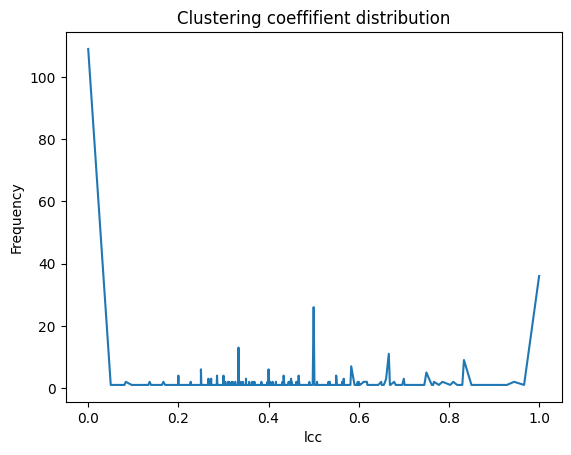

In [65]:
d=freq(list(lcc.values()))
d = sorted(d.items(), key= lambda x:x[0])
plt.plot([x[0] for x in d], [x[1] for x in d])
plt.xlabel("lcc")
plt.ylabel("Frequency")
plt.title("Clustering coeffifient distribution")
plt.show()